In [22]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt
from datetime import timezone, timedelta

In [23]:
timezone_offset = -5.0  # Eastern Standard Time (UTC−08:00)
tzinfo = timezone(timedelta(hours=timezone_offset))
current_dateTime = datetime.now(tzinfo)

In [24]:
begin_date = '2024-08-12T00:00:00.000-05:00'
#end_date = '2024-08-14T11:00:00.000-05:00'
end_date = current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z')


In [25]:
print(end_date)

2024-10-31T14:22:12.693738-0500


In [26]:
print(current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z'))

2024-10-31T14:22:12.693738-0500


In [27]:
#print(end_date)

In [28]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)

print (pompton_plains)

pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

     agency_cd   site_no          datetime tz_cd 194446_00065 194446_00065_cd
0           5s       15s               20d    6s          14n             10s
1         USGS  01388500  2024-08-12 01:00   EDT         9.47               P
2         USGS  01388500  2024-08-12 01:15   EDT         9.47               P
3         USGS  01388500  2024-08-12 01:30   EDT         9.46               P
4         USGS  01388500  2024-08-12 01:45   EDT         9.46               P
...        ...       ...               ...   ...          ...             ...
7733      USGS  01388500  2024-10-31 14:00   EDT         7.77               P
7734      USGS  01388500  2024-10-31 14:15   EDT         7.77               P
7735      USGS  01388500  2024-10-31 14:30   EDT         7.77               P
7736      USGS  01388500  2024-10-31 14:45   EDT         7.77               P
7737      USGS  01388500  2024-10-31 15:00   EDT         7.77               P

[7738 rows x 6 columns]


,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage


In [29]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2024-08-12 01:00,2.30,riverdale_gage
2024-08-12 01:15,2.30,riverdale_gage
2024-08-12 01:30,2.30,riverdale_gage
2024-08-12 01:45,2.29,riverdale_gage
2024-08-12 02:00,2.29,riverdale_gage


In [30]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2024-08-12 01:00,EDT,8.14,P
2,USGS,01388000,2024-08-12 01:05,EDT,8.14,P
3,USGS,01388000,2024-08-12 01:10,EDT,8.13,P
4,USGS,01388000,2024-08-12 01:15,EDT,8.13,P
5,USGS,01388000,2024-08-12 01:20,EDT,8.13,P
...,...,...,...,...,...,...
23155,USGS,01388000,2024-10-31 13:55,EDT,6.56,P
23156,USGS,01388000,2024-10-31 14:00,EDT,6.57,P
23157,USGS,01388000,2024-10-31 14:05,EDT,6.57,P
23158,USGS,01388000,2024-10-31 14:10,EDT,6.57,P


In [31]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2024-08-12 01:00,8.14,ramapo_gage
2024-08-12 01:05,8.14,ramapo_gage
2024-08-12 01:10,8.13,ramapo_gage
2024-08-12 01:15,8.13,ramapo_gage
2024-08-12 01:20,8.13,ramapo_gage


In [32]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,pompton_precip
2024-08-12 01:15,0.0,pompton_precip
2024-08-12 01:30,0.0,pompton_precip
2024-08-12 01:45,0.0,pompton_precip
2024-08-12 02:00,0.0,pompton_precip


In [33]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,ramapo_precip
2024-08-12 01:15,0.0,ramapo_precip
2024-08-12 01:30,0.0,ramapo_precip
2024-08-12 01:45,0.0,ramapo_precip
2024-08-12 02:00,0.0,ramapo_precip


In [34]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [35]:
merge

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage
...,...,...
2024-10-31 14:00,0.00,ramapo_precip
2024-10-31 14:15,0.00,ramapo_precip
2024-10-31 14:30,0.00,ramapo_precip


In [36]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2024-08-12 01:00,9.47,pompton_gage
1,2024-08-12 01:15,9.47,pompton_gage
2,2024-08-12 01:30,9.46,pompton_gage
3,2024-08-12 01:45,9.46,pompton_gage
4,2024-08-12 02:00,9.45,pompton_gage
...,...,...,...
54063,2024-10-31 14:00,0.00,ramapo_precip
54064,2024-10-31 14:15,0.00,ramapo_precip
54065,2024-10-31 14:30,0.00,ramapo_precip
54066,2024-10-31 14:45,0.00,ramapo_precip


In [37]:
test_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
test_data = test_data.convert_frequency(freq='H', agg_numeric="max")
test_data.head()

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


series
item_id      timestamp                  
pompton_gage 2024-08-12 01:00:00    9.47
             2024-08-12 02:00:00    9.45
             2024-08-12 03:00:00    9.43
             2024-08-12 04:00:00    9.41
             2024-08-12 05:00:00    9.39

In [38]:
predictor = TimeSeriesPredictor.load('models/pompton_gage_autogluon_6', require_version_match=False)

In [39]:
predictions = predictor.predict(test_data)

In [40]:
predictions

mean       0.1       0.2       0.3  \
item_id        timestamp                                                     
pompton_gage   2024-10-31 16:00:00  7.769708  7.736718  7.746489  7.753689   
               2024-10-31 17:00:00  7.769419  7.719762  7.735287  7.746782   
               2024-10-31 18:00:00  7.769130  7.702850  7.723322  7.735844   
               2024-10-31 19:00:00  7.768841  7.700664  7.713983  7.733031   
               2024-10-31 20:00:00  7.768552  7.691797  7.711062  7.730470   
               2024-10-31 21:00:00  7.768263  7.682938  7.706052  7.728587   
riverdale_gage 2024-10-31 15:00:00  1.769883  1.676343  1.704048  1.724463   
               2024-10-31 16:00:00  1.769767  1.628971  1.672988  1.705583   
               2024-10-31 17:00:00  1.769652  1.581722  1.639768  1.675273   
               2024-10-31 18:00:00  1.769536  1.576225  1.613989  1.668001   
               2024-10-31 19:00:00  1.769420  1.551786  1.606414  1.661441   
               2024-10-31 20:00:00  1.769304  1.527366  1.592905  1.656804   
ramapo_gage    2024-10-31 15:00:00  6.569693  6.552207  6.557386  6.561202   
               2024-10-31 16:00:00  6.569390  6.543070  6.551299  6.557392   
               2024-10-31 17:00:00  6.569087  6.533957  6.544807  6.551445   
               2024-10-31 18:00:00  6.568783  6.532648  6.539707  6.549805   
               2024-10-31 19:00:00  6.568480  6.527798  6.538011  6.548297   
               2024-10-31 20:00:00  6.568177  6.522954  6.535206  6.547149   
pompton_precip 2024-10-31 15:00:00 -0.000006 -0.020837 -0.014667 -0.010121   
               2024-10-31 16:00:00 -0.000007 -0.024746 -0.014358 -0.010578   
               2024-10-31 17:00:00 -0.000009 -0.029227 -0.018430 -0.011560   
               2024-10-31 18:00:00 -0.000011 -0.025737 -0.019505 -0.012584   
               2024-10-31 19:00:00 -0.000012 -0.023847 -0.015615 -0.010041   
               2024-10-31 20:00:00 -0.000014 -0.025694 -0.016614 -0.009527   
ramapo_precip  2024-10-31 16:00:00  0.000011 -0.304660 -0.214421 -0.147928   
               2024-10-31 17:00:00  0.000012 -0.336704 -0.224728 -0.145680   
               2024-10-31 18:00:00  0.000013 -0.377374 -0.231552 -0.145129   
               2024-10-31 19:00:00  0.000015 -0.354490 -0.234689 -0.164127   
               2024-10-31 20:00:00  0.000016 -0.279602 -0.192447 -0.113798   
               2024-10-31 21:00:00  0.000017 -0.299803 -0.187478 -0.100978   

                                         0.4       0.5       0.6       0.7  \
item_id        timestamp                                                     
pompton_gage   2024-10-31 16:00:00  7.763391  7.771165  7.779510  7.786941   
               2024-10-31 17:00:00  7.757358  7.766984  7.775354  7.787158   
               2024-10-31 18:00:00  7.752209  7.763864  7.778880  7.791573   
               2024-10-31 19:00:00  7.743756  7.754084  7.771395  7.790295   
               2024-10-31 20:00:00  7.744995  7.759124  7.775658  7.795176   
               2024-10-31 21:00:00  7.746481  7.769196  7.783406  7.799672   
riverdale_gage 2024-10-31 15:00:00  1.751971  1.774014  1.797676  1.818744   
               2024-10-31 16:00:00  1.735568  1.762861  1.786593  1.820063   
               2024-10-31 17:00:00  1.721671  1.754718  1.797294  1.833284   
               2024-10-31 18:00:00  1.698407  1.727694  1.776775  1.830362   
               2024-10-31 19:00:00  1.702623  1.742683  1.789561  1.844903   
               2024-10-31 20:00:00  1.707536  1.771943  1.812232  1.858357   
ramapo_gage    2024-10-31 15:00:00  6.566345  6.570465  6.574889  6.578827   
               2024-10-31 16:00:00  6.562997  6.568099  6.572535  6.578792   
               2024-10-31 17:00:00  6.560118  6.566296  6.574255  6.580983   
               2024-10-31 18:00:00  6.555488  6.560963  6.570138  6.580157   
               2024-10-31 19:00:00  6.555996  6.563484  6.572248  6.582594   
               2024-10-31 20:00:00  6.556633  6.568674  6.576

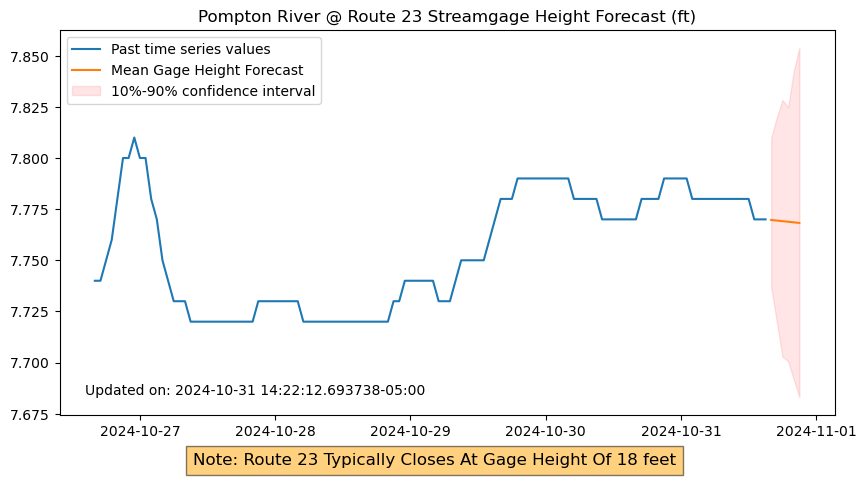

In [41]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Streamgage Height Forecast (ft)')


y_past = test_data.loc[item_id]
y_pred = predictions.loc[item_id]

plt.plot(y_past[-120:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean Gage Height Forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 18 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.15, 0.15, 'Updated on: '+str(current_dateTime), ha='left', fontsize=10)
plt.legend(loc = 'upper left');
plt.savefig('pompton-gage-forecast.png')

In [42]:
print(current_dateTime)

2024-10-31 14:22:12.693738-05:00
